<a href="https://colab.research.google.com/github/nuruldinikamilah/PTI_UTS/blob/main/Datasets-Layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Layoffs - Nurul Dini Kamilah
https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022

Dataset ini berisikan data Layoffs dari seluruh dunia. Layoffs sendiri adalah tindakan perusahaan melakukan pemutusan hubungan kerja baik sementara maupun permanen. Dataset Layoff ini, merupakan Layoff yang terjadi dari saat COVID dari tahun 2020 hingga 2022. Saya memilih dataset ini karena tertarik dan ingin mengetahui industri apa yang paling terdampak layoff akibat dari COVID ini dan hal hal lainnya.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp /content/drive/MyDrive/KaggleDatasetAPI/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d theakhilb/layoffs-data-2022

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/layoffs-data-2022.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [ ]:
df = "layoffs_data.csv"
data = pd.read_csv(df,error_bad_lines=False)

print(data)

            Company        Location        Industry        Date  \
0            Xiaomi         Beijing        Consumer  2022-12-19   
1          TuSimple       San Diego  Transportation  2022-12-16   
2          Tomorrow         Hamburg         Finance  2022-12-16   
3          Revelate        Montreal            Data  2022-12-16   
4            E Inc.         Toronto  Transportation  2022-12-16   
...             ...             ...             ...         ...   
1825   HopSkipDrive     Los Angeles  Transportation  2020-03-13   
1826    Panda Squad     SF Bay Area        Consumer  2020-03-13   
1827  Tamara Mellon     Los Angeles          Retail  2020-03-12   
1828       EasyPost  Salt Lake City       Logistics  2020-03-11   
1829      Homebound     SF Bay Area     Real Estate         NaN   

                                                 Source  Funds_Raised  \
0     https://technode.com/2022/12/19/chinese-phone-...        7400.0   
1     https://www.wsj.com/articles/tusimple-plans

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#@title 1. Company mana saja dengan jumlah Lay Offs tertinggi di Dunia dari tahun 2020,2021,2022?
data.sort_values(by = "Laid_Off_Count", ascending = False).head(10)

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off
245,Meta,SF Bay Area,Consumer,2022-11-09,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,26000.0,IPO,2022-11-09 15:04:03,United States,11000.0,0.13,https://docs.google.com/spreadsheets/d/1edAZoF...
179,Amazon,Seattle,Retail,2022-11-16,https://www.nytimes.com/2022/11/14/technology/...,108.0,IPO,2022-11-16 17:40:58,United States,10000.0,0.03,https://docs.google.com/spreadsheets/d/1f0QvaM...
1253,Booking.com,Amsterdam,Travel,2020-07-30,https://skift.com/2020/08/04/booking-com-restr...,NaN,Acquired,2020-08-04 15:02:25,Netherlands,4375.0,0.25,Unknown
180,Cisco,SF Bay Area,Infrastructure,2022-11-16,https://www.bizjournals.com/sanjose/news/2022/...,2.0,IPO,2022-11-17 17:15:04,United States,4100.0,0.05,Unknown
275,Twitter,SF Bay Area,Consumer,2022-11-04,https://www.nytimes.com/2022/11/04/technology/...,12900.0,IPO,2022-11-04 14:48:05,United States,3700.0,0.50,https://docs.google.com/spreadsheets/d/1OoD3pV...
1402,Uber,SF Bay Area,Transportation,2020-05-06,https://layoffs.fyi/2020/05/12/uber-laid-off-3...,24700.0,IPO,2020-05-06 13:49:11,United States,3700.0,0.14,Unknown
1357,Uber,SF Bay Area,Transportation,2020-05-18,https://layoffs.fyi/2020/05/18/uber-lays-off-3...,24700.0,IPO,2020-05-18 15:28:24,United States,3000.0,0.13,Unknown
1133,Better.com,New York City,Real Estate,2022-03-08,https://www.nytimes.com/2022/03/08/business/be...,905.0,Unknown,2022-03-09 00:46:57,United States,3000.0,0.33,Unknown
1557,Groupon,Chicago,Retail,2020-04-13,https://layoffs.fyi/2020/04/17/groupon-laid-of...,1400.0,IPO,2020-04-13 21:14:40,United States,2800.0,0.44,Unknown
1146,Peloton,New York City,Fitness,2022-02-08,https://techcrunch.com/2022/02/08/peloton-ceo-...,1900.0,IPO,2022-02-08 17:08:53,United States,2800.0,0.20,Unknown


### Ini dia 10 Company dengan Lay Off tertinggi di Dunia. Peringkat pertama adalah Meta Company yang terletak di SF Bay Area, United States dengan jumlah 11000.0

In [ ]:
#@title 2. Dari semua company, industri apa yang paling banyak (kemunculannya) pada layoffs?
#melihat berapa banyak value counts kolom industry pada data
ids = data['Industry'].value_counts()
ids.shape

(28,)

In [ ]:
#mencari ada berapa banyak company
company = data['Company'].value_counts()
company.shape

(1521,)

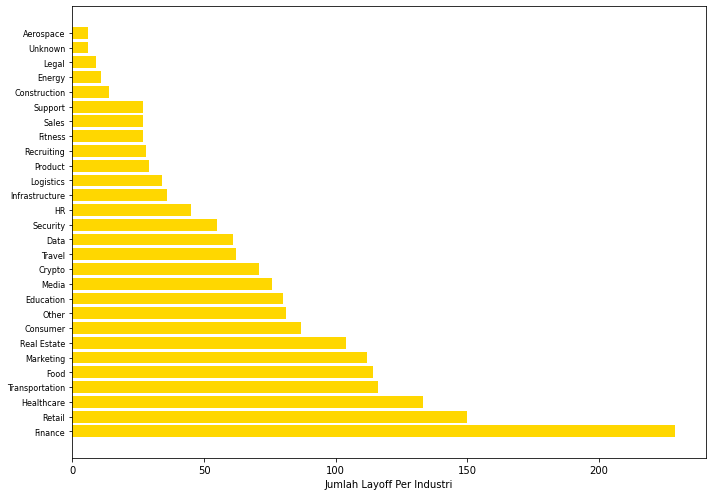

In [ ]:
import numpy as np
#membuat 2 variabel baru yaitu jumlah industry dan nama industry
jumlah_industry = data['Industry'].value_counts().sort_values(ascending=False)
nama_industry = ['Finance','Retail','Healthcare','Transportation','Food','Marketing','Real Estate','Consumer','Other','Education','Media','Crypto','Travel','Data','Security','HR','Infrastructure',
                 'Logistics','Product','Recruiting','Fitness','Sales','Support','Construction','Energy','Legal','Unknown','Aerospace']

bar_coords= np.arange(len(jumlah_industry))
fig, ax = plt.subplots(figsize=(10,7))

plt.barh(nama_industry,jumlah_industry, color='gold')
plt.xlabel("Jumlah Layoff Per Industri")
plt.yticks(bar_coords, nama_industry, fontsize = 8)
plt.title("")
plt.tight_layout()

plt.show() #menampikan diagram

Berdasarkan data diagram diatas, industri yang paling banyak muncul yg terdampak layoff setelah covid ini adalah Industri Finance dengan jumlah 229, dari 1521 Company.

Text(0.5, 1.0, 'Industri Yang Pekerja atau Pegawainya Paling Terdampak')

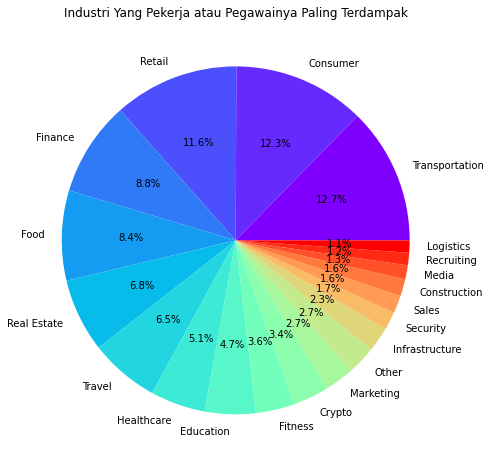

In [ ]:
#@title Lalu jika berdasarkan laid off count atau jumlah layoff, industri mana yang pekerjanya paling terdampak layoff?
#agregasi antara kolom industri dan kolom laid off count menggunakan sum dan mengambil 20 teratas
data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head(20).plot(ylabel="",
figsize=(8,8), kind='pie', autopct="%2.1f%%",colormap='rainbow')
plt.title("Industri Yang Pekerja atau Pegawainya Paling Terdampak")

### Dari kedua diagram diatas, bisa kita lihat bahwa, **meskipun Industri Finance menjadi industri yang paling banyak terdampak (dilihat dari kemunculannya dari seluruh company)** Namun, jika kita jumlahkan dengan "seberapa banyak orang yang terdampak pada industri tersebut", maka **Industri Transportasi menjadi industri dengan jumlah pekerja terbanyak yang terdampak Layoff ini dengan jumlah persentase 12.7%.**

In [ ]:
#@title 3. Persentase setiap negara yang terkena layoffs
#Menggunakan value_counts untuk mengetahui ada berapa banyak negara
negara = data['Country'].value_counts()
negara.shape #shape untuk mengetahui ada berapa baris pada variabel negara

(55,)

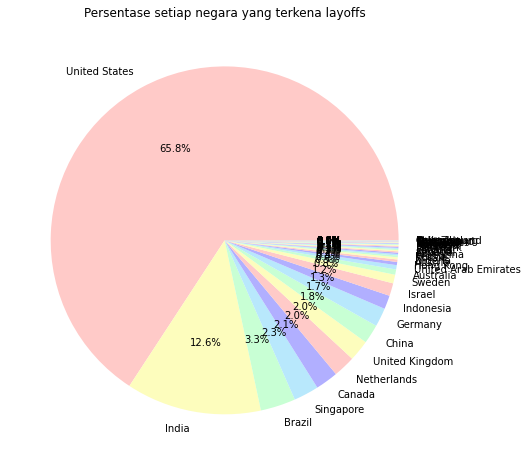

In [ ]:
plt.title("Persentase setiap negara yang terkena layoffs") #judulnya
#ingin mengetahui total dengan menggunakan sum() yang diambil dari kolom country dan laid_off_count dan mengambil 5 teratas menggunakan head()
data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(ylabel="",
figsize=(8,8), kind='pie', autopct="%2.1f%%", colors=["#FFCAC8","#FDFDBD","#C8FFD4","#B8E8FC","#B1AFFF"])

### Dari diagram diatas bisa kita ketahui bahwa dari 55 negara yang terdapat pada dataset yang berisi negara di seluruh dunia, United States menjadi negara paling besar atau paling banyak yang terdampak layoffs dengan persentase 65.8%. Disusul oleh India(12.6%), Brazil(3.3%), Singapore(2.3%) dan Canada(2.1%).

In [ ]:
#@title 4. Dari nomor 3, kita ketahui bahwa United States menjadi negara paling besar terdampak layyofs. Lalu, wilayah United States yang mana lebih tepatnya yang paling banyak terdampak?
#membuat variabel baru untuk menampilkan data yg hanya negara united states
lokasi_US = data['Country'].str.startswith('United States')
display(data[lokasi_US])

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off
0,Xiaomi,Beijing,Consumer,2022-12-19,https://technode.com/2022/12/19/chinese-phone-...,7400.0,IPO,2022-12-19 16:46:32,United States,NaN,NaN,Unknown
1,TuSimple,San Diego,Transportation,2022-12-16,https://www.wsj.com/articles/tusimple-plans-la...,648.0,IPO,2022-12-18 04:12:29,United States,700.0,0.50,Unknown
5,Autograph,Los Angeles,Crypto,2022-12-16,https://www.businessinsider.com/tom-brady-nft-...,205.0,Series B,2022-12-19 22:13:27,United States,NaN,NaN,Unknown
8,SonderMind,Denver,Healthcare,2022-12-16,https://www.bizjournals.com/denver/news/2022/1...,183.0,Series C,2022-12-18 04:19:22,United States,NaN,0.15,Unknown
9,Freshworks,SF Bay Area,Support,2022-12-15,https://inc42.com/buzz/facing-macroeconomic-he...,484.0,IPO,2022-12-15 16:21:46,United States,90.0,0.02,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1825,HopSkipDrive,Los Angeles,Transportation,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,0.10,Unknown
1826,Panda Squad,SF Bay Area,Consumer,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,0.75,Unknown
1827,Tamara Mellon,Los Angeles,Retail,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,0.40,Unknown
1828,EasyPost,Salt Lake City,Logistics,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,75.0,NaN,Unknown


In [ ]:
data[lokasi_US].groupby('Location')['Laid_Off_Count'].sum().sort_values(ascending=False)
#agregasi dari kedua kolom yang mengacu pada variabel sebelumnya yg telah dibuat yaitu lokasi_us

Location
SF Bay Area      80710.0
New York City    22043.0
Seattle          16051.0
Boston            7430.0
Los Angeles       5928.0
                  ...   
Santa Barbara        0.0
New Haven            0.0
Richmond             0.0
New Orleans          0.0
Lexington            0.0
Name: Laid_Off_Count, Length: 79, dtype: float64

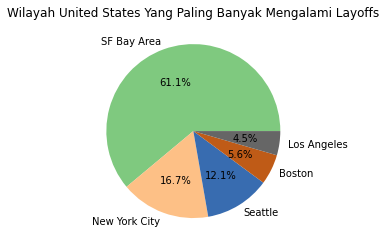

In [ ]:
#visualisasi
plt.title("Wilayah United States Yang Paling Banyak Mengalami Layoffs")
data[lokasi_US].groupby('Location')['Laid_Off_Count'].sum().sort_values(ascending=False).head().plot(ylabel=""
, kind='pie', stacked=True, autopct="%2.1f%%", colormap='Accent')

### Ternyata SF Bay Area (San Francisco Bay Area) menjadi wilayah/lokasi di United States yang paling banyak mengalami layoffs akibat dari covid-19 ini dengan jumlah persentase 61.1%.

In [ ]:
#@title 5. Grafik Line Chart Setiap Tahunnya
#Menambahkan kolom year yang diambil dari kolom date
data['Year'] = pd.to_datetime(data['Date']).dt.year
display(data) #menampilkan data

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off,Year
0,Xiaomi,Beijing,Consumer,2022-12-19,https://technode.com/2022/12/19/chinese-phone-...,7400.0,IPO,2022-12-19 16:46:32,United States,NaN,NaN,Unknown,2022.0
1,TuSimple,San Diego,Transportation,2022-12-16,https://www.wsj.com/articles/tusimple-plans-la...,648.0,IPO,2022-12-18 04:12:29,United States,700.0,0.50,Unknown,2022.0
2,Tomorrow,Hamburg,Finance,2022-12-16,https://www.businessinsider.de/gruenderszene/f...,29.0,Unknown,2022-12-18 04:15:07,Germany,30.0,0.25,Unknown,2022.0
3,Revelate,Montreal,Data,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,26.0,Series A,2022-12-19 17:17:13,Canada,24.0,0.30,Unknown,2022.0
4,E Inc.,Toronto,Transportation,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,NaN,IPO,2022-12-19 17:19:15,Canada,NaN,NaN,Unknown,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,HopSkipDrive,Los Angeles,Transportation,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,0.10,Unknown,2020.0
1826,Panda Squad,SF Bay Area,Consumer,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,0.75,Unknown,2020.0
1827,Tamara Mellon,Los Angeles,Retail,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,0.40,Unknown,2020.0
1828,EasyPost,Salt Lake City,Logistics,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,75.0,NaN,Unknown,2020.0


In [ ]:
#melihat apakah ada missing values
data.isna().sum()

Company                         0
Location                        0
Industry                        0
Date                            1
Source                          0
Funds_Raised                  135
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                552
Percentage                    597
List_of_Employees_Laid_Off      0
Year                            1
dtype: int64

In [ ]:
#Mengisi missing values pada kolom Year
data['Year'] = data['Year'].fillna(2021)
display(data)

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off,Year
0,Xiaomi,Beijing,Consumer,2022-12-19,https://technode.com/2022/12/19/chinese-phone-...,7400.0,IPO,2022-12-19 16:46:32,United States,NaN,NaN,Unknown,2022.0
1,TuSimple,San Diego,Transportation,2022-12-16,https://www.wsj.com/articles/tusimple-plans-la...,648.0,IPO,2022-12-18 04:12:29,United States,700.0,0.50,Unknown,2022.0
2,Tomorrow,Hamburg,Finance,2022-12-16,https://www.businessinsider.de/gruenderszene/f...,29.0,Unknown,2022-12-18 04:15:07,Germany,30.0,0.25,Unknown,2022.0
3,Revelate,Montreal,Data,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,26.0,Series A,2022-12-19 17:17:13,Canada,24.0,0.30,Unknown,2022.0
4,E Inc.,Toronto,Transportation,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,NaN,IPO,2022-12-19 17:19:15,Canada,NaN,NaN,Unknown,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,HopSkipDrive,Los Angeles,Transportation,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,0.10,Unknown,2020.0
1826,Panda Squad,SF Bay Area,Consumer,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,0.75,Unknown,2020.0
1827,Tamara Mellon,Los Angeles,Retail,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,0.40,Unknown,2020.0
1828,EasyPost,Salt Lake City,Logistics,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,75.0,NaN,Unknown,2020.0


In [ ]:
#Mengkonversikan nilai year yang asalnya float menjadi integer
data['Year'] = data['Year'].astype('int')
display(data)

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off,Year
0,Xiaomi,Beijing,Consumer,2022-12-19,https://technode.com/2022/12/19/chinese-phone-...,7400.0,IPO,2022-12-19 16:46:32,United States,NaN,NaN,Unknown,2022
1,TuSimple,San Diego,Transportation,2022-12-16,https://www.wsj.com/articles/tusimple-plans-la...,648.0,IPO,2022-12-18 04:12:29,United States,700.0,0.50,Unknown,2022
2,Tomorrow,Hamburg,Finance,2022-12-16,https://www.businessinsider.de/gruenderszene/f...,29.0,Unknown,2022-12-18 04:15:07,Germany,30.0,0.25,Unknown,2022
3,Revelate,Montreal,Data,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,26.0,Series A,2022-12-19 17:17:13,Canada,24.0,0.30,Unknown,2022
4,E Inc.,Toronto,Transportation,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,NaN,IPO,2022-12-19 17:19:15,Canada,NaN,NaN,Unknown,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,HopSkipDrive,Los Angeles,Transportation,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,8.0,0.10,Unknown,2020
1826,Panda Squad,SF Bay Area,Consumer,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,6.0,0.75,Unknown,2020
1827,Tamara Mellon,Los Angeles,Retail,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,20.0,0.40,Unknown,2020
1828,EasyPost,Salt Lake City,Logistics,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,75.0,NaN,Unknown,2020


In [ ]:
data['Year'].nunique()

3

In [ ]:
tahun=data['Year'].value_counts()
display(tahun)

2022    1153
2020     633
2021      44
Name: Year, dtype: int64

In [ ]:
peningkatan = data.groupby('Year')['Laid_Off_Count'].sum().sort_values(ascending=False)
display(peningkatan)

Year
2022    152542.0
2020     80968.0
2021     15023.0
Name: Laid_Off_Count, dtype: float64

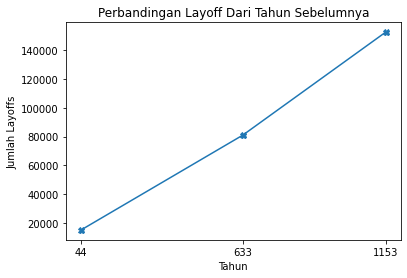

Tahun2020=633 Tahun2021=44 Tahun2022=1153


In [ ]:
#visualisasi plot line chart
tahunnya = ['2020','2021','2022']

plt.xticks(tahun)
plt.plot(tahun,peningkatan, marker='X')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Layoffs")
plt.title("Perbandingan Layoff Dari Tahun Sebelumnya")
plt.show()
print("Tahun2020=633 Tahun2021=44 Tahun2022=1153")

### Dari grafik diatas bisa kita lihat bahwa:
*   Terjadi penurunan dari tahun 2020 yg asalnya sebanyak 633, menjadi 44 di tahun 2021.
*  Dan meningkat pesat di tahun 2022 menjadi 1153.






In [ ]:
#@title 6. Apakah funds raised atau pendanaan mempengaruhi jumlah pekerja yang terdampak?
display(data[['Funds_Raised', 'Laid_Off_Count']].corr())

,Funds_Raised,Laid_Off_Count
Funds_Raised,1.00000,0.12029
Laid_Off_Count,0.12029,1.00000


(0.0, 11549.85)

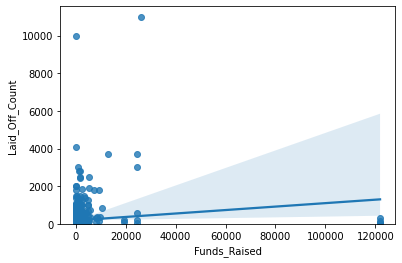

In [ ]:
sns.regplot(x='Funds_Raised', y='Laid_Off_Count', data=data)
plt.ylim(0)

### Ternyata funds raised ini tidak berpenggaruh dan nilai korelasi hanya sekitar 0.12029

Karena saya orang Indonesia, maka mari kita lihat data yang ada di Indonesia.

In [ ]:
#@title 7. Layoffs berdasarkan industri di Indonesia
#indonesia = data[data['Country']=='Indonesia'] #ini tidak bisa karena boolean katanya
#display(indonesia)
#menampilkan data yang ada di indonesia saja
indonesia = data['Country'].str.startswith('Indonesia')
display(data[indonesia])

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off,Year
12,JD.ID,Jakarta,Retail,2022-12-14,https://jakartaglobe.id/business/jdid-layoffs-...,5100.0,IPO,2022-12-15 02:19:38,Indonesia,200.0,0.30,Unknown,2022
65,Sayurbox,Jakarta,Food,2022-12-07,https://www.techinasia.com/sayurbox-lays-off-2022,139.0,Series C,2022-12-09 05:08:34,Indonesia,NaN,0.05,Unknown,2022
106,Ula,Jakarta,Retail,2022-11-30,https://dailysocial.id/post/ula-layoff-2022,140.0,Series B,2022-12-01 06:27:24,Indonesia,134.0,0.23,Unknown,2022
131,Ajaib,Jakarta,Finance,2022-11-28,https://www.techinasia.com/indonesian-investme...,245.0,Unknown,2022-11-30 06:12:35,Indonesia,67.0,0.08,Unknown,2022
150,SIRCLO,Jakarta,Retail,2022-11-22,https://dailysocial.id/post/sirclo-layoff-2022,92.0,Series B,2022-11-22 17:53:56,Indonesia,160.0,0.08,Unknown,2022
165,Ruangguru,Jakarta,Education,2022-11-18,https://www.techinasia.com/ruangguru-lays-hund...,205.0,Unknown,2022-11-21 05:53:59,Indonesia,NaN,NaN,Unknown,2022
226,Shopee,Jakarta,Food,2022-11-14,https://www.straitstimes.com/business/sea-e-co...,NaN,Unknown,2022-11-15 04:44:20,Indonesia,NaN,NaN,Unknown,2022
231,GoTo Group,Jakarta,Transportation,2022-11-10,https://www.reuters.com/technology/indonesias-...,1300.0,IPO,2022-11-11 05:06:07,Indonesia,1300.0,0.12,https://coda.io/@daanyal-kamaal/goto-alumni-list,2022
278,KoinWorks,Jakarta,Finance,2022-11-04,https://www.techinasia.com/koinworks-layoff-2022,180.0,Unknown,2022-11-27 23:31:11,Indonesia,70.0,0.08,Unknown,2022
408,Xendit,Jakarta,Finance,2022-10-04,https://www.techinasia.com/xendit-lay-off-indo...,534.0,Series D,2022-10-05 15:51:42,Indonesia,NaN,0.05,Unknown,2022


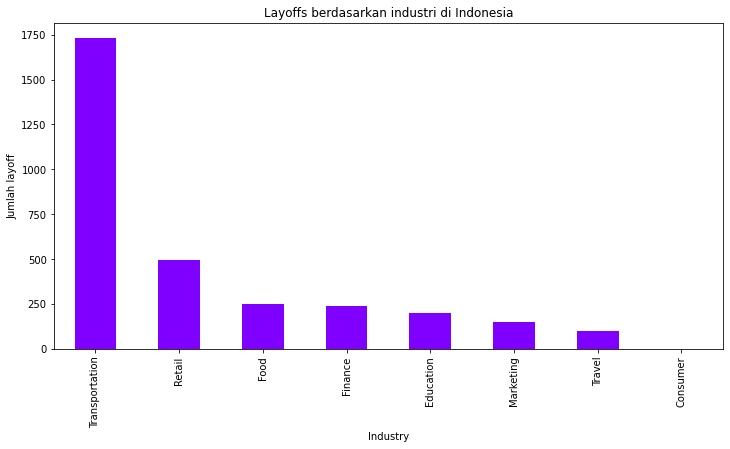

In [ ]:
data[indonesia].groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(title =
"Layoffs berdasarkan industri di Indonesia" ,
ylabel="Jumlah layoff", figsize=(12,6), kind='bar', stacked=True, colormap='rainbow')


### di Indonesia sendiri ternyata yang paling terdampak layoffs adalah industri transportasi.

### **Kesimpulan:**
COVID-19 ini banyak menyebabkan layoff di seluruh dunia. Dari banyak company sebanyak 1521 company yang tersebar di 55 negara, dan Meta Company menjadi company yang melakukan layoffs terbanyak di dunia dengan jumlah 11000.0.

Ada sebanyak 28 industri yang terdampak, dan industri transportasi menjadi industri yang pekerja atau pegawainya paling banyak mengalami layoff dengan persentase 12.7%. Sedangkan, industri finance menjadi industri yang banyak terkena layoff sebanyak 229 dari 1521 company.

Dari 55 negara tersebut, United States menjadi negara dengan jumlah layoff tertinggi dengan persentase 65.8%. Dan SF Bay Area, menjadi wilayah di United States yang paling banyak mengalami layoff tersebut.

Selama 3 tahun semenjak 2020 hingga 2022, jumlah layoffs mengalami penurunan juga kenaikan. Tepatnya, dimulai dari tahun 2020 ada sebanyak 633 pekerja yang mengalami layoffs. Penurunan terjadi cukup drastis di tahun selanjutnya tahun 2021 menjadi 44. Namun, di tahun berikutnya yakni tahun 2022 justru terjadi kenaikan yang pesat menjadi 1153.

Dari hal ini, timbul pertanyaan, apakah Fund Raising yang dimiliki perusahaan atau pendanaan, dimana dana yang didapat bisa diperuntukkan guna berjalannya bisnis di masa mendatang akan berpengaruh terhadap jumlah pekerjanya yg terdampak layoffs. Ternyata kedua hal tersebut tidak ada hubungannya karena koefisien kolerasi sebesar 0.12029.

